In [119]:
library("DESeq2")

In [120]:
meta_path = "metadata.csv"
sampleTable = read.csv(meta_path, row.names = 1)
sampleTable$biological=factor(sampleTable$biological)
sampleTable$technical=factor(sampleTable$technical)
sampleTable$sample_type=factor(sampleTable$sample_type)
sampleTable$sample_type2=factor(sampleTable$sample_type2)
sampleTable$sample_type <- relevel(sampleTable$sample_type, ref="unenriched")
sampleTable$sample_type2 <- relevel(sampleTable$sample_type2, ref="unenriched")
sampleTable

,biological,technical,unenriched,probe,sample_type,sample_type2,sample_name,path
Neg1rep1,1,1,FALSE,FALSE,neg,probe,neg1,data/Neg1rep1/DTASelect-filter.txt
Neg1rep2,1,2,FALSE,FALSE,neg,probe,neg1,data/Neg1rep2/DTASelect-filter.txt
Neg1rep3,1,3,FALSE,FALSE,neg,probe,neg1,data/Neg1rep3/DTASelect-filter.txt
Nov_unenriched1rep1,1,1,TRUE,FALSE,unenriched,unenriched,unenriched1,data/Nov_unenriched1rep1/DTASelect-filter.txt
Nov_unenriched1rep2,1,2,TRUE,FALSE,unenriched,unenriched,unenriched1,data/Nov_unenriched1rep2/DTASelect-filter.txt
Nov_unenriched1rep3,1,3,TRUE,FALSE,unenriched,unenriched,unenriched1,data/Nov_unenriched1rep3/DTASelect-filter.txt
Nov_unenriched2rep1,2,1,TRUE,FALSE,unenriched,unenriched,unenriched2,data/Nov_unenriched2rep1/DTASelect-filter.txt
Nov_unenriched2rep2,2,2,TRUE,FALSE,unenriched,unenriched,unenriched2,data/Nov_unenriched2rep2/DTASelect-filter.txt
Nov_unenriched2rep3,2,3,TRUE,FALSE,unenriched,unenriched,unenriched2,data/Nov_unenriched2rep3/DTASelect-filter.txt
Nov_unenriched3rep1,3,1,TRUE,FALSE,unenriched,unenriched,unenriched3,data/Nov_unenriched3rep1/DTASelect-filter.txt


In [121]:
countData = read.csv("out/df_filt.csv", row.names = 1)
sampleTable = sampleTable[colnames(countData),]

In [122]:
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type + biological)
dds = DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.
final dispersion estimates
fitting model and testing


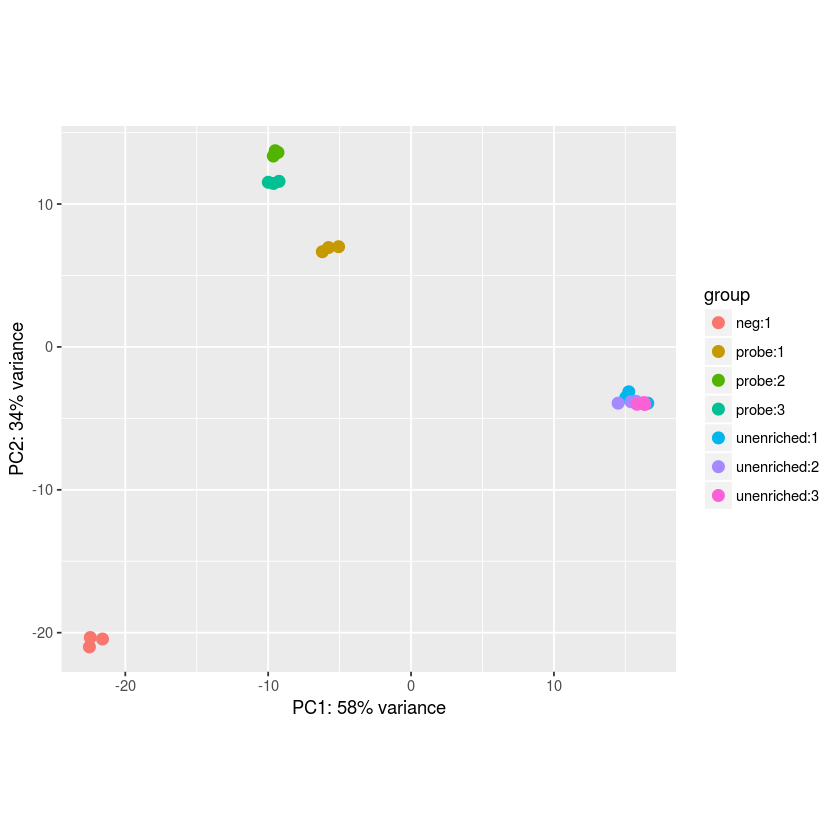

In [123]:
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(vsd, intgroup=c("sample_type", "biological"))

In [124]:
# write out normalize, transformed count matrix
write.csv(getVarianceStabilizedData(dds), "out/df_norm_transformed.csv")

In [125]:
## collapse triplicates
dds = collapseReplicates(dds, dds$sample_name)
sampleTable = colData(dds)

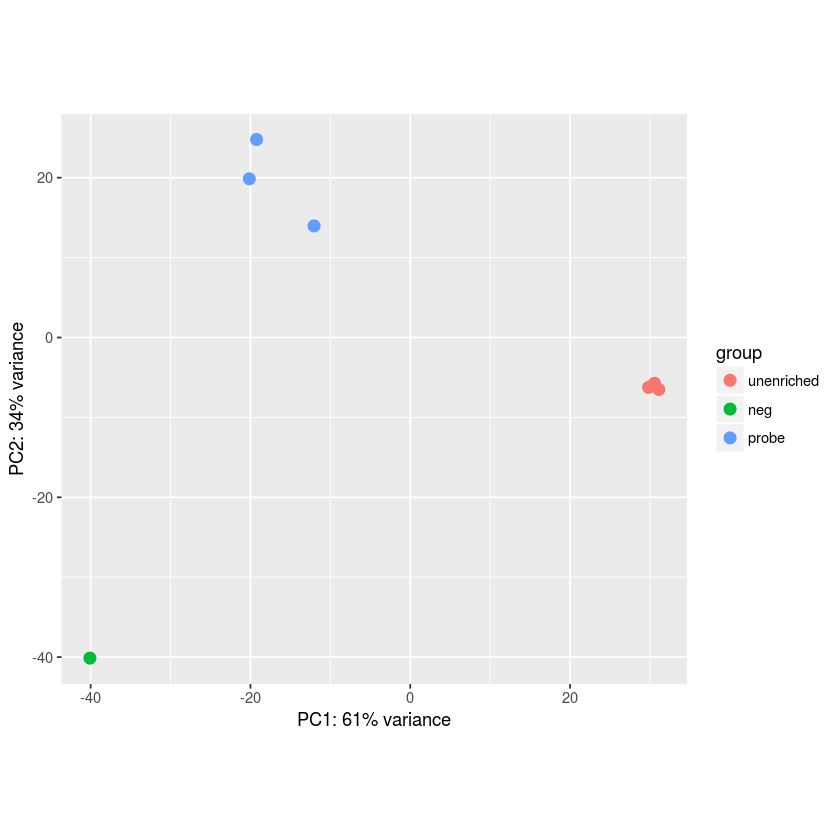

In [126]:
vsd <- varianceStabilizingTransformation(dds, blind = FALSE)
plotPCA(vsd, intgroup=c("sample_type"))

In [127]:
# subtract the neg samples
countData = counts(dds)
countData[,"vk1"] = countData[,"vk1"] - countData[,"neg1"]
countData[,"vk2"] = countData[,"vk2"] - countData[,"neg1"]
countData[,"vk3"] = countData[,"vk3"] - countData[,"neg1"]
countData[countData<0] = 0
### get rid of the neg samples
non_neg = rownames(sampleTable[sampleTable$sample_type != "neg",])
countData = countData[,non_neg]
sampleTable = sampleTable[non_neg,]
dds = DESeqDataSetFromMatrix(countData, colData = sampleTable, ~ sample_type + biological)

converting counts to integer mode
factor levels were dropped which had no samples


In [128]:
dds = estimateDispersions(dds)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates


In [129]:
# write out count matrix
write.csv(counts(dds), "out/df_subtract.csv")
write.csv(counts(dds, normalized=TRUE), "out/df_subtract_norm.csv")
write.csv(getVarianceStabilizedData(dds), "out/df_subtract_norm_transformed.csv")

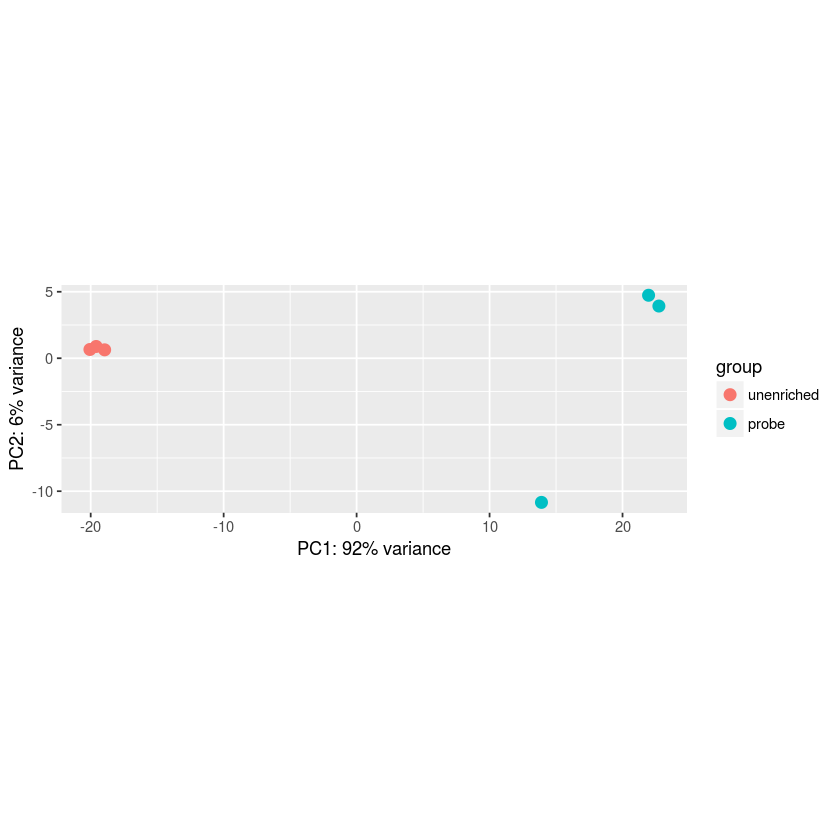

In [130]:
vsd <- vst(dds)
plotPCA(vsd, intgroup=c("sample_type"))